In [1]:
# https://scipython.com/blog/the-m%C3%B6bius-function-and-the-mertens-conjecture/
# https://www.youtube.com/watch?v=uvMGZb0Suyc

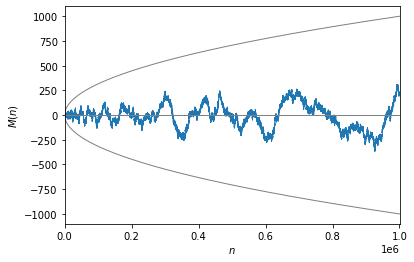

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

NMAX = 1000000

def get_mu_seq(nmax):
    """Return the values of the Möbius function up to nmax in a list."""

    sqrt_nmax = int(np.sqrt(nmax))
    mu = [1] * (nmax+1)
    # Comopose the numbers from their factors, keeping track of the
    # parity of the number of factors in the sign. If a number is the
    # product of two prime factors set its value of mu to 0.
    for k in range(2, sqrt_nmax+1):
        if mu[k] == 1:
            for j in range(k, nmax+1, k):
                mu[j] *= -k
            for j in range(k*k, nmax+1, k*k):
                mu[j] = 0
    # Set the value of the Möbius function according to the value in mu.
    for k in range(2, nmax+1):
        if mu[k] == k:
            mu[k] = 1
        elif mu[k] == -k:
            mu[k] = -1
        elif mu[k] < 0:
            mu[k] = 1
        elif mu[k] > 0:
            mu[k] = -1
    return mu


mu = get_mu_seq(NMAX)

n = range(1,NMAX+1)
# Plot the Mertens function and its (wrongly) conjectured bounds, ±sqrt(n).
plt.plot(n, np.cumsum(mu[1:]), lw=1)
plt.plot(n, np.sqrt(n), '0.5', lw=1)
plt.plot(n, -np.sqrt(n), '0.5', lw=1)
plt.xlim(0,NMAX+1)
plt.axhline(0, 0, NMAX+1, c='0.5', lw=1)
plt.xlabel('$n$')
plt.ylabel('$M(n)$')
plt.show()